# Sentiment Analysis on Twitter for 2020 US Elections

In [1]:
# Import necessary libraries and packages

import tweepy as tw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import re
import configparser
import os
import nltk
import pycountry
import string
plt.style.use('fivethirtyeight')
%matplotlib inline

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

C:\Users\Owner\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Owner\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Owner\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# Set Twitter Api Credentials

apikey = "wtbFbO7SzQadEkBp6MbaYDLSM"
apisecretkey = "v5JQMhysr5ensRnOvEyFY1aaSBbWncVIflij5XnNiJ6TPrJOS2"
accesstoken = "114472401-oPKvIc4kf29r0YOUGuMlFlfpY06axDjni7dzfAI3"
accesstokensecret = "rbqG5sXQsBdbexgS1UUfnLuzn7KOKJLUZtdFzzFEDKseY"

In [3]:
# Create Authenticated session 

auth = tw.OAuthHandler(apikey, apisecretkey)
auth.set_access_token(accesstoken, accesstokensecret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

#keyword = "Joe Biden" # String for Search 
date_since = "2021-01-20" # Date of Inauguration ceremonies of the President
#noOfTweet ="2500"
#tweets = tw.Cursor(api.search, q=search_words, lang="en", since=date_since).items(noOfTweet)

tweets = tw.Cursor(api.search, q=keyword, since=date_since).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: Joe Biden
Please enter how many tweets to analyze: 10000


In [31]:
#Number of Tweets (Total, Positive, Negative, Neutral)

tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  500
positive number:  113
negative number:  204
neutral number:  183


In [32]:
tweet_list

,0
0,"RT @DoctorFishbones: The NY Times, which has b..."
1,RT @n_th_n_: Caging in ICE jail has skyrockete...
2,RT @ReporteyPuntoMX: #JoeBiden arremete contra...
3,RT @johnpavlovitz: 'Why I’m Never Putting a Jo...
4,RT @RealPNavarro: How come Joe Biden's jackboo...
...,...
495,RT @stablegeniusinc: ‘It’s chilling what is ha...
496,"RT @BreitbartNews: “Over there [in Cuba], ther..."
497,"RT @WendyRogersAZ: Dear Cuba, when you become ..."
498,RT @NanciAma: People are dying while Covid idi...


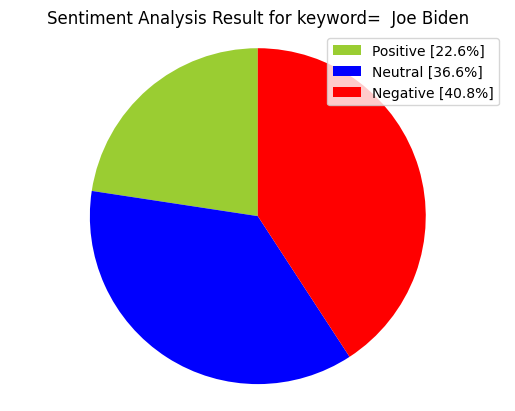

In [33]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [34]:
# Drop duplicate records

tweet_list.drop_duplicates(inplace = True)

In [35]:
#Creating new dataframe and new features

tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,"RT @DoctorFishbones: The NY Times, which has b...","RT @DoctorFishbones: The NY Times, which has b..."
1,RT @n_th_n_: Caging in ICE jail has skyrockete...,RT @n_th_n_: Caging in ICE jail has skyrockete...
2,RT @ReporteyPuntoMX: #JoeBiden arremete contra...,RT @ReporteyPuntoMX: #JoeBiden arremete contra...
3,RT @johnpavlovitz: 'Why I’m Never Putting a Jo...,RT @johnpavlovitz: 'Why I’m Never Putting a Jo...
4,RT @RealPNavarro: How come Joe Biden's jackboo...,RT @RealPNavarro: How come Joe Biden's jackboo...
...,...,...
487,RT @nowthisnews: President Joe Biden says that...,RT @nowthisnews: President Joe Biden says that...
488,RT @TheEconomist: What is Joe Biden’s new Chin...,RT @TheEconomist: What is Joe Biden’s new Chin...
491,Remember ... he lost to Joe Biden who campaign...,Remember ... he lost to Joe Biden who campaign...
494,RT @JosephP70893374: .@SenSchumer. I'm a voter...,RT @JosephP70893374: .@SenSchumer. I'm a voter...


In [36]:
#Cleaning Text (RT, Punctuation etc)

remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,"RT @DoctorFishbones: The NY Times, which has b...",the ny times which has been comparing joe bi...
1,RT @n_th_n_: Caging in ICE jail has skyrockete...,caging in ice jail has skyrocketed caging in...
2,RT @ReporteyPuntoMX: #JoeBiden arremete contra...,joebiden arremete contra facebook respecto ...
3,RT @johnpavlovitz: 'Why I’m Never Putting a Jo...,why i m never putting a joe biden flag on my...
4,RT @RealPNavarro: How come Joe Biden's jackboo...,how come joe biden s jackboots can go door to...
5,RT @legendovideos: Joe Biden: O comunismo é um...,joe biden o comunismo um sistema falido e...
6,RT @Jim_Jordan: Driving to the grocery store t...,driving to the grocery store today you ll ...
7,RT @FDRLST: Joe Biden: Requiring Voter ID Is B...,joe biden requiring voter id is bringing bac...
8,RT @PoliticusSarah: Only Barack Obama and Rona...,only barack obama and ronald reagan have regi...
9,RT @JunkScience: Joe Biden has guaranteed OPEC...,joe biden has guaranteed opec windfall profit...


In [37]:
# Sentiment Analysis
# Calculating Negative, Positive, Neutral and Compound values
# Create New features in data frame

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,"RT @DoctorFishbones: The NY Times, which has b...",the ny times which has been comparing joe bi...,-0.208333,0.208333,negative,0.075,0.925,0.000,-0.1779
1,RT @n_th_n_: Caging in ICE jail has skyrockete...,caging in ice jail has skyrocketed caging in...,0.188889,0.333333,negative,0.141,0.769,0.090,-0.2960
2,RT @ReporteyPuntoMX: #JoeBiden arremete contra...,joebiden arremete contra facebook respecto ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,RT @johnpavlovitz: 'Why I’m Never Putting a Jo...,why i m never putting a joe biden flag on my...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
4,RT @RealPNavarro: How come Joe Biden's jackboo...,how come joe biden s jackboots can go door to...,0.000000,0.000000,positive,0.000,0.793,0.207,0.5719
5,RT @legendovideos: Joe Biden: O comunismo é um...,joe biden o comunismo um sistema falido e...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
6,RT @Jim_Jordan: Driving to the grocery store t...,driving to the grocery store today you ll ...,0.500000,0.500000,negative,0.057,0.943,0.000,-0.1027
7,RT @FDRLST: Joe Biden: Requiring Voter ID Is B...,joe biden requiring voter id is bringing bac...,0.000000,0.000000,negative,0.281,0.719,0.000,-0.5994
8,RT @PoliticusSarah: Only Barack Obama and Rona...,only barack obama and ronald reagan have regi...,0.166667,0.611111,positive,0.000,0.853,0.147,0.4767
9,RT @JunkScience: Joe Biden has guaranteed OPEC...,joe biden has guaranteed opec windfall profit...,0.160000,0.540000,positive,0.091,0.776,0.132,0.2263


In [38]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [39]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

#Count_values for sentiment

count_values_in_column(tw_list,"sentiment")

,Total,Percentage
negative,91,38.24
neutral,91,38.24
positive,56,23.53


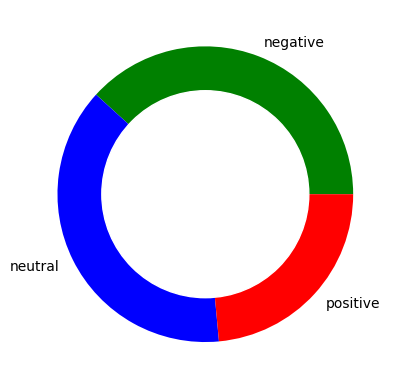

In [40]:
# create data for Pie Chart

pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot

my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

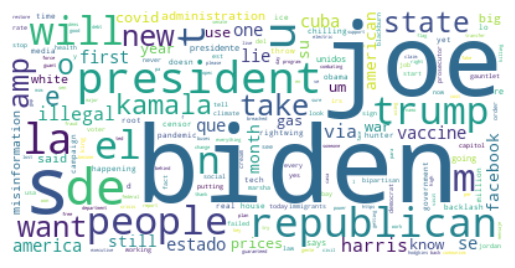

In [41]:
#Creating wordcloud for all tweets
#Creating the text variable

text = str(tw_list["text"].values)

# Creating word_cloud with text as argument in .generate() method

wordcloud = WordCloud(collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

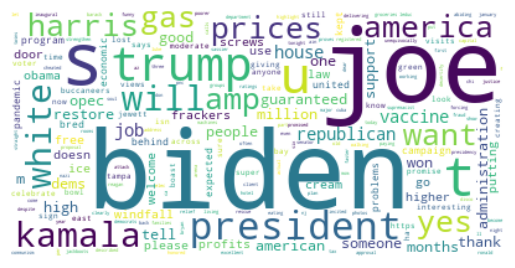

In [42]:
#Creating wordcloud for tweets that have positive sentiments
#Creating the text variable

text = str(tw_list_positive["text"].values)

# Creating word_cloud with text as argument in .generate() method

wordcloud = WordCloud(collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

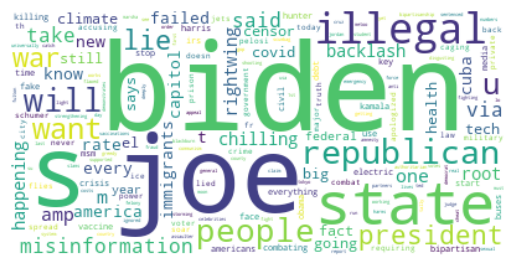

In [43]:
#Creating wordcloud for tweets that have negative sentiments
#Creating the text variable

text = str(tw_list_negative["text"].values)

# Creating word_cloud with text as argument in .generate() method

wordcloud = WordCloud(collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [44]:
#Calculating tweet's lenght and word count

tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [45]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,107.36
neutral,87.00
positive,106.36


In [46]:
#Removing Punctuation

def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))


#Appliyng tokenization

def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))


#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))


#Appliyng Stemmer

ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

#Cleaning Text

def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [47]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,"RT @DoctorFishbones: The NY Times, which has b...",the ny times which has been comparing joe bi...,-0.208333,0.208333,negative,0.075,0.925,0.000,-0.1779,120,23,the ny times which has been comparing joe bi...,"[, the, ny, times, which, has, been, comparing...","[, ny, times, comparing, joe, biden, fdr, past...","[, ny, time, compar, joe, biden, fdr, past, ye..."
1,RT @n_th_n_: Caging in ICE jail has skyrockete...,caging in ice jail has skyrocketed caging in...,0.188889,0.333333,negative,0.141,0.769,0.090,-0.2960,128,20,caging in ice jail has skyrocketed caging in...,"[, caging, in, ice, jail, has, skyrocketed, ca...","[, caging, ice, jail, skyrocketed, caging, fed...","[, cage, ice, jail, skyrocket, cage, feder, pr..."
2,RT @ReporteyPuntoMX: #JoeBiden arremete contra...,joebiden arremete contra facebook respecto ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,87,12,joebiden arremete contra facebook respecto ...,"[, joebiden, arremete, contra, facebook, respe...","[, joebiden, arremete, contra, facebook, respe...","[, joebiden, arremet, contra, facebook, respec..."
3,RT @johnpavlovitz: 'Why I’m Never Putting a Jo...,why i m never putting a joe biden flag on my...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,58,12,why i m never putting a joe biden flag on my...,"[, why, i, m, never, putting, a, joe, biden, f...","[, never, putting, joe, biden, flag, truck, ]","[, never, put, joe, biden, flag, truck, ]"
4,RT @RealPNavarro: How come Joe Biden's jackboo...,how come joe biden s jackboots can go door to...,0.000000,0.000000,positive,0.000,0.793,0.207,0.5719,123,23,how come joe biden s jackboots can go door to...,"[, how, come, joe, biden, s, jackboots, can, g...","[, come, joe, biden, jackboots, go, door, door...","[, come, joe, biden, jackboot, go, door, door,..."


In [48]:
#Appliyng Countvectorizer

countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

238 Number of reviews has 1209 words


In [49]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,abbott,abd,abdullah,abid,abl,absolut,abus,accomplish,account,...,yer,yet,yla,york,yr,yup,z,zahlreich,ze,zuckerberg
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# Most Used Words

count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
biden,166
joe,145
de,24
presid,21
la,16
republican,15
peopl,14
n,14
el,14
us,14


In [51]:
#Function to ngram

def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [52]:
#n2_bigram

n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)
n2_bigrams

[('joe biden', 139),
 ('president joe', 14),
 ('kamala harris', 9),
 ('biden kamala', 8),
 ('republican states', 6),
 ('estados unidos', 6),
 ('big tech', 5),
 ('chilling happening', 5),
 ('happening rightwing', 5),
 ('rightwing backlash', 5),
 ('backlash biden', 5),
 ('biden takes', 5),
 ('takes root', 5),
 ('root republican', 5),
 ('biden says', 5),
 ('illegal immigrants', 4),
 ('marsha blackburn', 4),
 ('ice cream', 4),
 ('biden throws', 4),
 ('throws gauntlet', 4)]

In [53]:
#n3_trigram

n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)
n3_trigrams

[('president joe biden', 14),
 ('joe biden kamala', 8),
 ('biden kamala harris', 8),
 ('chilling happening rightwing', 5),
 ('happening rightwing backlash', 5),
 ('rightwing backlash biden', 5),
 ('backlash biden takes', 5),
 ('biden takes root', 5),
 ('takes root republican', 5),
 ('root republican states', 5),
 ('joe biden throws', 4),
 ('biden throws gauntlet', 4),
 ('big tech censor', 4),
 ('joe biden says', 4),
 ('joe biden america', 3),
 ('joe biden doesn', 3),
 ('joe biden wants', 3),
 ('lost joe biden', 3),
 ('joe biden using', 3),
 ('estados unidos joe', 3)]